# Data Cleaning

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm


In [101]:
df = pd.read_csv('data/kc_house_data.csv')
#df.info()

# 1. Converting column dtypes

In [102]:
# converting date column from str to int
df['date'] = pd.to_datetime(df['date']).dt.year
#df.info()

In [103]:
#extracting zip code from address and converting to int
df['zipcode'] = df['address'].str.extract(r'\b(\d{5})[,]\s*United States\b').astype('int')

# 2. Filtering out rows not in King County

In [104]:
df.drop_duplicates(inplace=True)
#df.info()

In [105]:
#filtering out adresses not in Washington
df_wash = df[df['address'].str.contains('Washington')]
#df.info()

In [106]:
df_king = df_wash[(df_wash['lat'] >= 46.71) 
                       & (df['lat'] <= 48.31) 
                       & (df['long'] >= -123.07) 
                       & (df['long'] <= -119.90)]
#df_king.info()

#### URL for King County Coordinate info
[King County Coordinates and Zipcode info](https://www5.kingcounty.gov/sdc/FGDCDocs/ZIPCODE_fgdc.htm)

# 3. Looking at heatmap of new dataset 

In [9]:
df_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29238 non-null  int64  
 1   date           29238 non-null  int64  
 2   price          29238 non-null  float64
 3   bedrooms       29238 non-null  int64  
 4   bathrooms      29238 non-null  float64
 5   sqft_living    29238 non-null  int64  
 6   sqft_lot       29238 non-null  int64  
 7   floors         29238 non-null  float64
 8   waterfront     29238 non-null  object 
 9   greenbelt      29238 non-null  object 
 10  nuisance       29238 non-null  object 
 11  view           29238 non-null  object 
 12  condition      29238 non-null  object 
 13  grade          29238 non-null  object 
 14  heat_source    29208 non-null  object 
 15  sewer_system   29225 non-null  object 
 16  sqft_above     29238 non-null  int64  
 17  sqft_basement  29238 non-null  int64  
 18  sqft_g

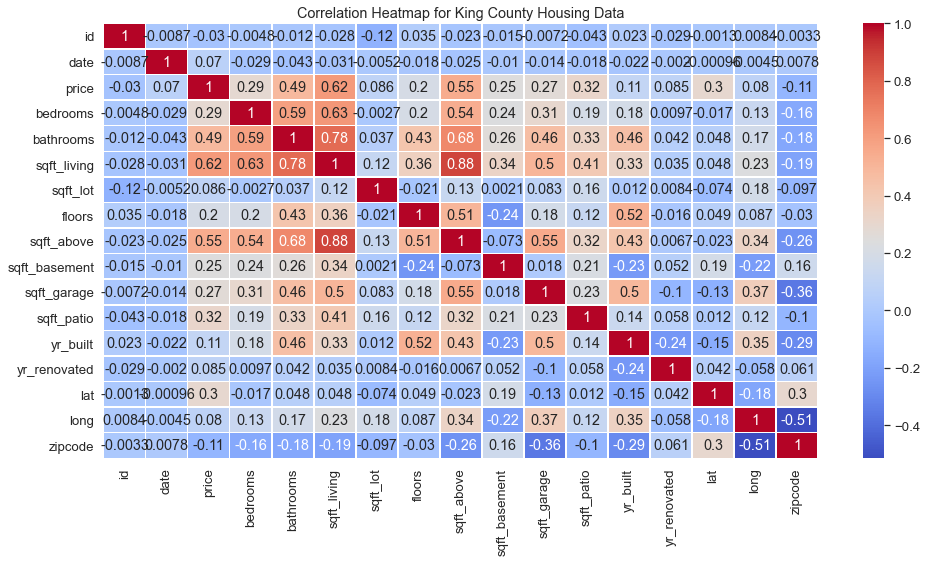

In [8]:
corr_matrix = df_king.corr(method='pearson')

sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for King County Housing Data")
plt.show()

In [215]:
df_copy['bath_bed'] = df_copy['bathrooms']/df_copy['bedrooms']
df_copy['bed_bath'] = df_copy['bedrooms']/df_copy['bathrooms']
df_copy['bed_bath_sum'] = df_copy['bedrooms']+df_copy['bathrooms']

In [68]:
dummies = pd.get_dummies(df_king['zipcode'], prefix='Zip')
data_with_dummies = pd.concat([df_king['price'], dummies], axis=1)
data_with_dummies.corr()['price'].sort_values(ascending=False)

price        1.000000
Zip_98004    0.305723
Zip_98039    0.211272
Zip_98040    0.202481
Zip_98033    0.150010
               ...   
Zip_98168   -0.073861
Zip_98002   -0.080010
Zip_98001   -0.081729
Zip_98023   -0.086143
Zip_98042   -0.092707
Name: price, Length: 88, dtype: float64

In [69]:
dummies_1 = pd.get_dummies(df_king['waterfront'], prefix='water')
data_with_dummies1 = pd.concat([df_king['price'], dummies_1], axis=1)
data_with_dummies1.corr()['price'].sort_values(ascending=False)

price        1.000000
water_YES    0.236795
water_NO    -0.236795
Name: price, dtype: float64

In [70]:
dummies_2 = pd.get_dummies(df_king['greenbelt'], prefix='green')
data_with_dummies2 = pd.concat([df_king['price'], dummies_2], axis=1)
data_with_dummies2.corr()['price'].sort_values(ascending=False)

price        1.000000
green_YES    0.068669
green_NO    -0.068669
Name: price, dtype: float64

In [71]:
dummies_3 = pd.get_dummies(df_king['nuisance'], prefix='nuisance')
data_with_dummies3 = pd.concat([df_king['price'], dummies_3], axis=1)
data_with_dummies3.corr()['price'].sort_values(ascending=False)

price           1.000000
nuisance_YES    0.005765
nuisance_NO    -0.005765
Name: price, dtype: float64

In [72]:
dummies_4 = pd.get_dummies(df_king['view'], prefix='view')
data_with_dummies4 = pd.concat([df_king['price'], dummies_4], axis=1)
data_with_dummies4.corr()['price'].sort_values(ascending=False)

price             1.000000
view_EXCELLENT    0.292026
view_GOOD         0.123156
view_AVERAGE      0.101427
view_FAIR         0.061619
view_NONE        -0.278925
Name: price, dtype: float64

In [73]:
dummies_5 = pd.get_dummies(df_king['condition'], prefix='condish')
data_with_dummies5 = pd.concat([df_king['price'], dummies_5], axis=1)
data_with_dummies5.corr()['price'].sort_values(ascending=False)

price                1.000000
condish_Average      0.040666
condish_Very Good    0.007169
condish_Poor        -0.023801
condish_Fair        -0.032935
condish_Good        -0.040603
Name: price, dtype: float64

In [74]:
dummies_6 = pd.get_dummies(df_king['grade'], prefix='grade')
data_with_dummies6 = pd.concat([df_king['price'], dummies_6], axis=1)
data_with_dummies6.corr()['price'].sort_values(ascending=False)

price                  1.000000
grade_11 Excellent     0.320910
grade_10 Very Good     0.302662
grade_12 Luxury        0.287422
grade_9 Better         0.210577
grade_13 Mansion       0.201251
grade_1 Cabin          0.002216
grade_2 Substandard   -0.007484
grade_3 Poor          -0.015268
grade_8 Good          -0.016393
grade_4 Low           -0.022121
grade_5 Fair          -0.064131
grade_6 Low Average   -0.168432
grade_7 Average       -0.262216
Name: price, dtype: float64

In [75]:
dummies_7 = pd.get_dummies(df_king['sewer_system'], prefix='grade')
data_with_dummies7 = pd.concat([df_king['price'], dummies_7], axis=1)
data_with_dummies7.corr()['price'].sort_values(ascending=False)

price                       1.000000
grade_PUBLIC                0.023752
grade_PUBLIC RESTRICTED    -0.000646
grade_PRIVATE RESTRICTED   -0.005370
grade_PRIVATE              -0.023647
Name: price, dtype: float64

In [76]:
dummies_8 = pd.get_dummies(df_king['heat_source'], prefix='grade')
data_with_dummies8 = pd.concat([df_king['price'], dummies_8], axis=1)
data_with_dummies8.corr()['price'].sort_values(ascending=False)

price                      1.000000
grade_Gas                  0.146483
grade_Gas/Solar            0.037044
grade_Other                0.001032
grade_Oil/Solar           -0.002357
grade_Electricity/Solar   -0.008331
grade_Oil                 -0.070739
grade_Electricity         -0.118626
Name: price, dtype: float64

In [188]:
df_copy = df_king.copy()

In [189]:
# lambda function to extract the first character of each object and convert it to an int.
extract_num = lambda x: int(x[:2])

# Apply the lambda function
df_copy['grade'] = df_copy['grade'].apply(extract_num)

In [210]:
df_price = df_copy[(df_copy['price'] <= 1900000)]

<AxesSubplot:ylabel='Frequency'>

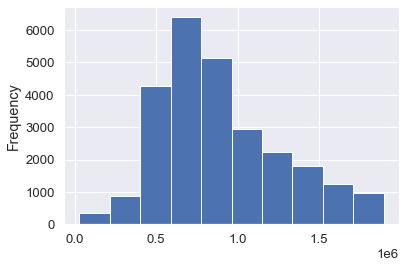

In [212]:
df_price['price'].plot(kind='hist')

In [214]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26210 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26210 non-null  int64  
 1   date           26210 non-null  int64  
 2   price          26210 non-null  float64
 3   bedrooms       26210 non-null  int64  
 4   bathrooms      26210 non-null  float64
 5   sqft_living    26210 non-null  int64  
 6   sqft_lot       26210 non-null  int64  
 7   floors         26210 non-null  float64
 8   waterfront     26210 non-null  object 
 9   greenbelt      26210 non-null  object 
 10  nuisance       26210 non-null  object 
 11  view           26210 non-null  object 
 12  condition      26210 non-null  object 
 13  grade          26210 non-null  int64  
 14  heat_source    26181 non-null  object 
 15  sewer_system   26200 non-null  object 
 16  sqft_above     26210 non-null  int64  
 17  sqft_basement  26210 non-null  int64  
 18  sqft_g

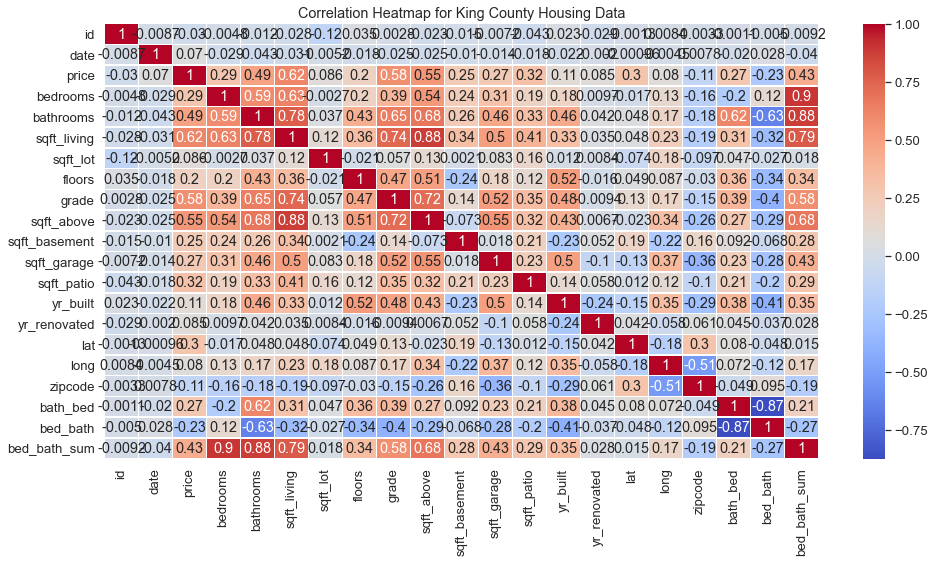

In [216]:
corr_matrix = df_copy.corr(method='pearson')

sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for King County Housing Data")
plt.show()

In [218]:
df_copy['bathrooms'].value_counts()

2.5     8180
2.0     6947
1.0     4570
3.0     4079
3.5     2155
1.5     1766
4.0      638
4.5      525
5.0      142
5.5      101
6.0       45
0.0       30
6.5       25
7.0       12
7.5       11
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

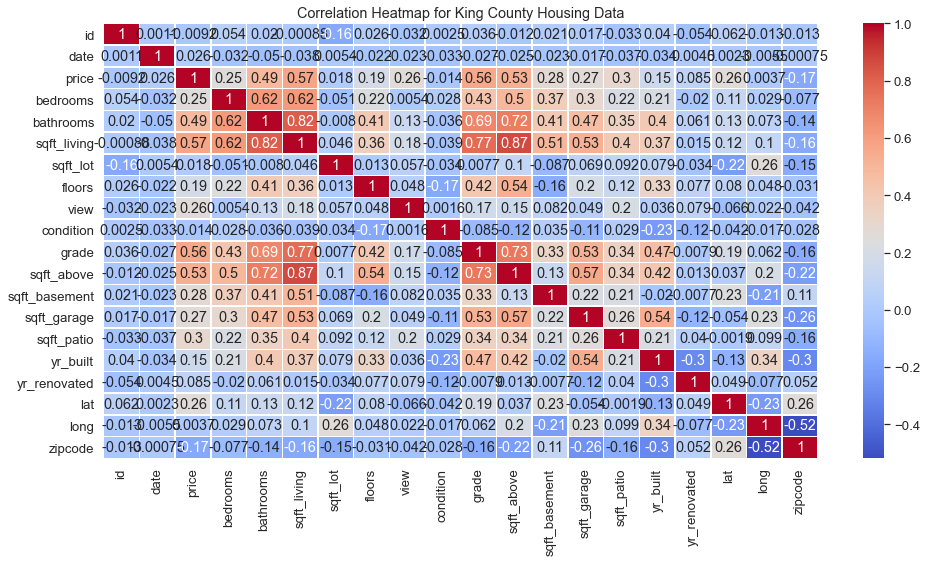

In [177]:
corr_matrix = df_copy.corr(method='pearson')

sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for King County Housing Data")
plt.show()

In [157]:
df_copy['condition'].value_counts()

3    17638
4     8048
5     3259
2      229
1       64
Name: condition, dtype: int64

In [159]:
df_copy2 = df_copy.copy()

In [ ]:
data.Gender = [gender[item] for item in data.Gender]
print(data)

In [153]:
condish = {'Poor': 1,'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

In [155]:
df_copy.condition = [condish[item] for item in df_copy.condition]

In [165]:
df_copy2['view'].value_counts()

NONE         25705
AVERAGE       1896
GOOD           870
EXCELLENT      552
FAIR           215
Name: view, dtype: int64

In [174]:
views = {'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}

In [175]:
df_copy2 = df_copy2.replace(to_replace='NONE', value=np.nan).dropna()

In [176]:
df_copy2.view = [views[item] for item in df_copy2.view]

In [172]:
df_copy2['view'].value_counts()

AVERAGE      1892
GOOD          869
EXCELLENT     548
FAIR          215
Name: view, dtype: int64

In [53]:
y = data_with_dummies['price']
x_baseline = data_with_dummies.drop(['Zip_98042', 'price'], axis=1)

df_zip_reg = sm.OLS(y, sm.add_constant(x_baseline))

In [54]:
df_zip_results = df_zip_reg.fit()

In [55]:
df_zip_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:02:13   Log-Likelihood:            -4.3517e+05
No. Observations:               29238   AIC:                         8.705e+05
Df Residuals:                   29151   BIC:                         8.712e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.697e+05   2.24e+04     29.914      0.000    6.26e+05    7.14e+05
Zip_98001  -5.301e+04    3.6e+04     -1.471      0.141   -1.24e+05    1.76e+04
Zip_98002  -1.951e+05   4.32e+04     -4.515      0.000    -2.8e+05    -1.1e+05
Zip_98003  -6.228e+04   4.04e+04     -1.543      0.123   -1.41e+05    1.68e+04
Zip_98004   3.037e+06   4.52e+04     67.148      0.000    2.95e+06    3.13e+06
Zip_98005   1.505e+06   5.71e+04     26.350      0.000    1.39e+06    1.62e+06
Zip_98006   1.202e+06    3.8e+04     31.601      0.000    1.13e+06    1.28e+06
Zip_98007     7.4e+05   6.11e+04     12.116      0.000     6.2e+05     8.6e+05
Zip_98008   8.637e+05   4.19e+04     20.625      0.000    7.82e+05    9.46e+05
Zip_98010   1.637e+05   4.56e+04      3.589      0.000    7.43e+04    2.53e+05
Zip_98011   5.376e+05    4.9e+04     10.976      0.000    4.42e+05    6.34e+05
Zip_98014   3.004e+05   6.04e+04      4.974      0.000    1.82e+05    4.19e+05
Zip_98019   3.026e+05   5.02e+04      6.025      0.000    2.04e+05    4.01e+05
Zip_98022  -2.296e+04   3.98e+04     -0.577      0.564   -1.01e+05    5.51e+04
Zip_98023  -5.135e+04   3.49e+04     -1.472      0.141    -1.2e+05     1.7e+04
Zip_98024   8.699e+05   6.97e+04     12.474      0.000    7.33e+05    1.01e+06
Zip_98027   7.101e+05   4.25e+04     16.725      0.000    6.27e+05    7.93e+05
Zip_98028   4.126e+05   4.39e+04      9.402      0.000    3.27e+05    4.99e+05
Zip_98029   8.904e+05   4.53e+04     19.665      0.000    8.02e+05    9.79e+05
Zip_98030  -2.802e+04   4.27e+04     -0.657      0.511   -1.12e+05    5.56e+04
Zip_98031  -3.588e+04   3.79e+04     -0.946      0.344    -1.1e+05    3.85e+04
Zip_98032   -8.82e+04   5.66e+04     -1.558      0.119   -1.99e+05    2.27e+04
Zip_98033   1.365e+06   3.63e+04     37.574      0.000    1.29e+06    1.44e+06
Zip_98034   6.239e+05   3.49e+04     17.856      0.000    5.55e+05    6.92e+05
Zip_98038   1.374e+05   3.29e+04      4.181      0.000     7.3e+04    2.02e+05
Zip_98039   4.649e+06   9.45e+04     49.206      0.000    4.46e+06    4.83e+06
Zip_98040   2.092e+06   4.39e+04     47.677      0.000    2.01e+06    2.18e+06
Zip_98045   3.849e+05   3.95e+04      9.749      0.000    3.08e+05    4.62e+05
Zip_98047  -1.764e+05   8.29e+04     -2.127      0.033   -3.39e+05   -1.39e+04
Zip_98050   9.308e+05   4.99e+05      1.865      0.062   -4.75e+04    1.91e+06
Zip_98051   2.733e+05    8.9e+04      3.070      0.002    9.88e+04    4.48e+05
Zip_98052   8.948e+05   3.71e+04     24.117      0.000    8.22e+05    9.68e+05
Zip_98053   8.928e+05    4.2e+04     21.242      0.000     8.1e+05    9.75e+05
Zip_98055   9903.0189   5.26e+04      0.188      0.851   -9.33e+04    1.13e+05
Zip_98056   3.276e+05   3.82e+04      8.581      0.000    2.53e+05    4.02e+05
Zip_98057  -2.158e+04   6.62e+04     -0.326      0.745   -1.51e+05    1.08e+05
Zi

# 4. looking at the different features

In [183]:
df_copy3 = df_copy2[(df_copy2['sqft_lot'] >= 6000) & (df_copy2['sqft_lot'] <= 9000)]

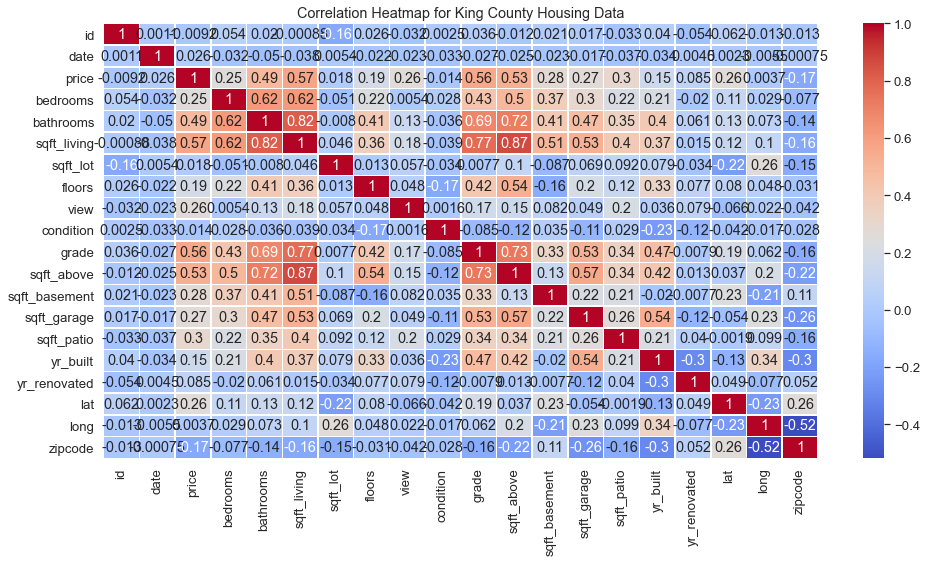

In [184]:
corr_matrix = df_copy2.corr(method='pearson')

sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for King County Housing Data")
plt.show()

In [ ]:
#df_king_out = F
#df_king_out.info()

In [ ]:
df_king_out['price'].plot(kind='box')

In [ ]:
df_view_no_out['price'].plot(kind='hist', )

## Categorizing columns in an effort to split up the data

In [ ]:
 0   id             30155 non-null  int64  #primary key
 2   price          30155 non-null  float64 #our data analysis target metric
    
 1   date           30155 non-null  object #date house sold (time)
 20  yr_built       30155 non-null  int64  # Year when house was built (time/constant)
 21  yr_renovated   30155 non-null  int64  # year when house was renovated (time/constant)

 8   waterfront     30155 non-null  object # Whether the house is on a waterfront (location/constant) (bool)
 9   greenbelt      30155 non-null  object # Whether the house is adjacent to a green belt (location/constant) (bool)
 10  nuisance       30155 non-null  object # Whether the house has traffic noise or other recorded nuisances (location/constant) (bool)
 11  view           30155 non-null  object # Quality of view from house (location/constant) (categorical)
 22  address        30155 non-null  object # address of house (location/constant) (categorical)
 23  lat            30155 non-null  float64 #lattitude coordinate (location/constant)
 24  long           30155 non-null  float64 #longitude coordinate (location/constant)    
    
 6   sqft_lot       30155 non-null  int64  # Square footage of the lot (feature/constant)   
 15  sewer_system   30141 non-null  object # Sewer system for the house (feature/constant) Note: could change but not rly
       
 3   bedrooms       30155 non-null  int64  # number of bedrooms (feature/changeable)
 4   bathrooms      30155 non-null  float64 # number of full and half bathrooms (feature/changeable)
 7   floors         30154 non-null  float64 # number of floors/levels of house (feature/changeable)
 14  heat_source    30123 non-null  object # Heat source for the house (feature/chageable)
    
 12  condition      30155 non-null  object # How good the overall condition of the house is (descriptive)
 13  grade          30155 non-null  object # Overall grade of the house (descriptive)
       
 16  sqft_above     30155 non-null  int64  # Square footage of house apart from basement (feature)
 17  sqft_basement  30155 non-null  int64  # Square footage of the basement (feature)
 18  sqft_garage    30155 non-null  int64  # Square footage of garage space (feature)
 19  sqft_patio     30155 non-null  int64  # Square footage of outdoor porch or deck space (feature)
 5   sqft_living    30155 non-null  int64  # Square footage of living space in the home (feature)

# %load data/column_names.md
# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


### Condition Column info:

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Grade Column Info:

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.